[View in Colaboratory](https://colab.research.google.com/github/PatrickHuembeli/QML-Course-UPC-2018/blob/master/Deep_CNN/Deep_CNN.ipynb)

<h1>Deep neural networks and deep convolutionnal neural networks</h1>

---

**Alexandre Dauphin**

## Import the Libraries 

In [1]:
# import numpy and matplotlib

import numpy as np
from matplotlib import pyplot as plt

#import keras and tools from keras to generate neural networks and convolutionnal neural networks

import keras
from keras.models import Sequential,Model
from keras.layers import Input,Dense,Conv2D,MaxPooling2D,Flatten, Activation, BatchNormalization, GlobalAveragePooling2D
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16

# import the dataset

from keras.datasets import mnist

# scikit learn

from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

#miscellaneous

from collections import Counter

Using TensorFlow backend.


## Link the colab file to your google drive

---

By executing the next cell, we will be able to access and write data on the google drive

In [2]:
#link the google drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


## MNIST dataset
---
We now import the MNIST hanwritten digits and explore it. We first load the data

In [3]:
n_classes=10 #number of classes in the MNIST dataset, numbers from 0 to 9

(x_train,y_train1), (x_test,y_test1) = mnist.load_data()
x_train1 = x_train.astype('float32') / 255.
x_test1 = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

y_train = np_utils.to_categorical(y_train1, n_classes) # this keras funtion transforms the labels into vectors. For example, 2 becomes [0,0,1,0,0,0,0,0,0,0]
y_test = np_utils.to_categorical(y_test1, n_classes)

11493376/11490434 [==============================] - 0s 0us/step


We then plot them with their associated labels.

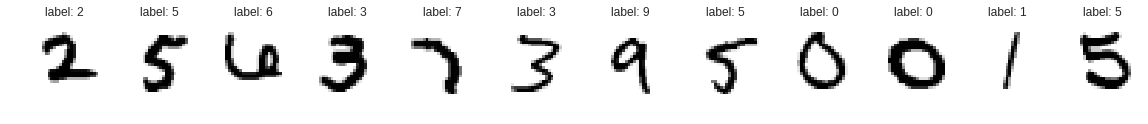

In [4]:
# We take 12 examples in the training set
nexample=12
mask=np.random.randint(x_train.shape[0],size=nexample)

fig,axes=plt.subplots(nrows=1,ncols=nexample,figsize=(20,20))

i=-1
for ax in axes.flat:
  i=i+1
  nn=mask[i]
  ax.imshow(x_train1[nn,:,:],cmap='gray_r')
  ax.set_title('label: '+str(y_train1[nn]))
  ax.axis('off')

## Deep neural networks (Fully connected)

We now construct our first neural network. The input of the neural network is a vector of 28X28=784 elements. We then make the data pass through 3 hidden fully connected neural networks with repectively 200, 64 and 10 neurons. We finally perform the classification in the last layer with a softmax function. 

Then, we compile model the model and we specify the Cost function (here cross entropy), the optimizer (adam, an elaborated version of the stochastic gradient descent), and the metrics.

By writing model.summay(), we can see the details of the model and the number of trainable parameters.

In [5]:
model = Sequential()
model.add(Dense(units=128, input_dim=784,activation='relu'))
model.add(Dense(units=64,activation='relu'))
model.add(Dense(units=10,activation='relu'))
model.add(Dense(units=10, activation='softmax'))


model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
Total params: 109,496
Trainable params: 109,496
Non-trainable params: 0
_________________________________________________________________


We now train the model. To this end, we use the function model.fit(). The latter allows one to choose the batch size and the division between training and validation set.

We put some checkpoints that will save the weigths of the neural network after each epoch. We also save the history after the training to have access to the learning curves (loss function and accuracy)

In [6]:
# This line should be put if the model has been previously trained
#model.load_weights('drive/My Drive/weights.best.hdf5')
# checkpoint
filepath="drive/My Drive/weights_fnn.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=0, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

# Verbose: 0 = silent, 1 = progress bar, 2 = one line per epoch

history=model.fit(x_train, y_train, epochs=40, batch_size=64,validation_split=0.2,callbacks=callbacks_list,verbose=1)

np.savez('drive/My Drive/history_fnn.npz',loss=history.history['loss'],val_loss=history.history['val_loss']\
         ,acc=history.history['acc'],val_acc=history.history['val_acc'])

Train on 48000 samples, validate on 12000 samples
Epoch 1/40
48000/48000 [==============================] - 4s 86us/step - loss: 2.2954 - acc: 0.1728 - val_loss: 1.9473 - val_acc: 0.2572
Epoch 2/40
48000/48000 [==============================] - 4s 81us/step - loss: 1.9259 - acc: 0.2822 - val_loss: 1.7114 - val_acc: 0.3875
Epoch 3/40
48000/48000 [==============================] - 4s 84us/step - loss: 1.6866 - acc: 0.3734 - val_loss: 1.6001 - val_acc: 0.3728
Epoch 4/40
48000/48000 [==============================] - 4s 83us/step - loss: 1.5273 - acc: 0.4169 - val_loss: 1.4390 - val_acc: 0.4473
Epoch 5/40
48000/48000 [==============================] - 4s 84us/step - loss: 1.4064 - acc: 0.4668 - val_loss: 1.3558 - val_acc: 0.4759
Epoch 6/40
48000/48000 [==============================] - 4s 82us/step - loss: 1.1246 - acc: 0.5780 - val_loss: 0.9729 - val_acc: 0.6140
Epoch 7/40
48000/48000 [==============================] - 4s 83us/step - loss: 0.8840 - acc: 0.6558 - val_loss: 0.7999 - val_acc

Let's have a look at the learning curves. To this end, we load the history that we previously saved.

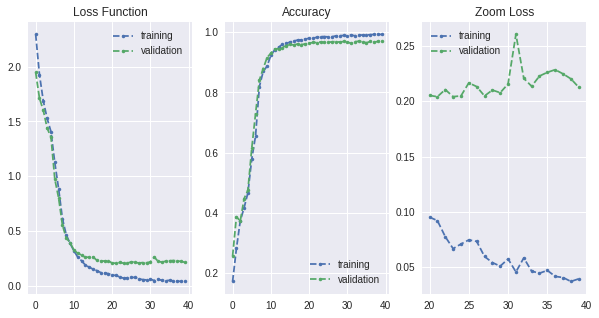

In [8]:
data=np.load('drive/My Drive/history_fnn.npz')
loss,val_loss,acc,val_acc=data['loss'],data['val_loss'],data['acc'],data['val_acc']

fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(10,5))

ax=axes[0]
ax.plot(loss,'.--',label='training')
ax.plot(val_loss,'.--',label='validation')
ax.set_title('Loss Function')
ax.legend()

ax=axes[1]
ax.plot(acc,'.--',label='training')
ax.plot(val_acc,'.--',label='validation')
ax.set_title('Accuracy')
ax.legend()

ax=axes[2]
vepochs=np.arange(np.size(loss))
ax.plot(vepochs[20:],loss[20:],'.--',label='training')
ax.plot(vepochs[20:],val_loss[20:],'.--',label='validation')
ax.set_title('Zoom Loss')
ax.legend();

The system is here starting to overfit: the accuracy on the training curve is reaching 99% while the accuracy on the validation set is stucked at 96%. 

When we predict the classes on the test set (here below), we find the same kind of accuracy.


**Homework**. The goal of the first task of the homework is to add some Dropout Layers to prevent this overfitting.



In [9]:
y_pred=model.predict_classes(x_test)
print('accuracy:',accuracy_score(y_test1,y_pred))

accuracy: 0.9703


Nervertheless, the results are still very good. With 3 lines of code, we are able to train a model that predicts correctly in 96% of the cases. We now want visualize the effect of the different layers on the original data from the test set. To this end, we first perform a PCA on the original data to visualize in a 2D plane the data.

accuracy of k-means: 0.5945


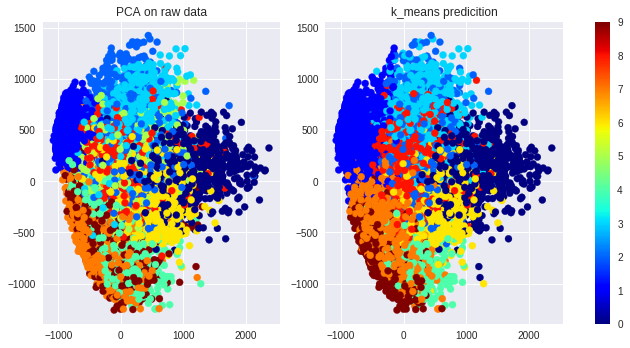

In [10]:
pca = PCA(n_components=2)
x_original=pca.fit_transform(x_test)

kmeans=KMeans(n_clusters=10)
kmeans.fit(x_test)
y_pred1=kmeans.predict(x_test)

vchange=np.ones(10)*1000
for i in np.arange(10):
  vchange[i]=Counter(y_test1[y_pred1==i]).most_common(1)[0][0]
  
y_pred=np.copy(y_pred1)
for i in np.arange(10):
  y_pred[y_pred1==i]=vchange[i]
 
print('accuracy of k-means:',accuracy_score(y_test1,y_pred))

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10,5))

ax=axes[0]
im1=ax.scatter(x_original[:,0],x_original[:,1],c=y_test1,cmap='jet')
ax.set_title('PCA on raw data')

ax=axes[1]
im2=ax.scatter(x_original[:,0],x_original[:,1],c=y_pred,cmap='jet')
ax.set_title('k_means predicition')

plt.tight_layout()
fig.colorbar(im2,ax=axes.ravel().tolist());


As we see in the left plot, the data do not cluster nicely. We also perform a cluster classifcation with k-means. Here the idea is to let the unsupervised algorithm find 10 clusters on the RAW data. We then associate a number to each cluster. To be able to compare these results with the other figure, We look at the frequency of the numbers in each cluster and the number with higher frequency becomes the number of the cluster. The accuracy of k-means on the Raw data is actually pretty low, 59%.

**Homework.** Run the unsupervised algorithm t-SNE on the data and compare with the results of PCA. Is there some interesting structure in the raw data?

We now perform the same analysis after passing through each layer.

accuracy score: 0.7651


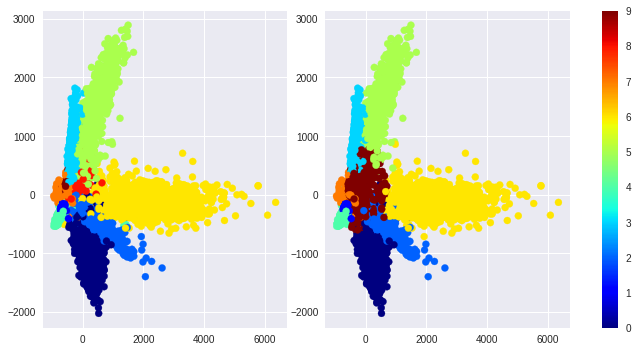

In [30]:
# This line should be put if the model has been previously trained
#model.load_weights('drive/My Drive/weights.best.hdf5')

#In get_layer(), you should insert the name of the layer you are interested in from model.summary()

test_data=x_test#x_train[:10000,:]#
test_label=y_test1#y_train1[:10000]#

layer1=Model(inputs=model.input,outputs=model.get_layer('dense_2').output)
layer1=layer1.predict(test_data)
xl1=pca.fit_transform(layer1)


kmeans=KMeans(n_clusters=10)
kmeans.fit(layer1)
y_pred1=kmeans.predict(layer1)


vchange=np.ones(10)*1000
for i in np.arange(10):
  vchange[i]=Counter(test_label[y_pred1==i]).most_common(1)[0][0]

y_pred=np.copy(y_pred1)
for i in np.arange(10):
  y_pred[y_pred1==i]=vchange[i]
 
print('accuracy score:',accuracy_score(test_label,y_pred))


fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10,5))

ax=axes[0]
im1=ax.scatter(xl1[:,0],xl1[:,1],c=test_label,cmap='jet')
ax.set_title('PCA with real labels')


ax=axes[1]
im2=ax.scatter(xl1[:,0],xl1[:,1],c=y_pred,cmap='jet')
ax.set_title('PCA with k_means predicition')

plt.tight_layout()
fig.colorbar(im2,ax=axes.ravel().tolist());

After passing through several layers, the data becomes separated in PCA. This is also confirmed with the k-means analysis which finds the clusters with 70% of success.

## Convolutional neural networks

--

We now focus on the classification of the MNIST dataset with convolutional neural networks.  To this end, we construct a CNN with 3 convolutional layers (each of them accompanied by max Pooling layer) and two fully connected neural networks.


In [40]:
cnn=Sequential()
cnn.add(Conv2D(16, (3, 3), activation='relu', padding='same',input_shape=(28, 28, 1)))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Flatten())
cnn.add(Dense(128, activation='relu'))
cnn.add(Dense(10, activation='relu'))
cnn.add(Dense(n_classes, activation='softmax'))

cnn.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 16)        2320      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 16)          2320      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 3, 3, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 144)               0         
__________

Notice, that due to the nature of the convolutional filters, the numbers of parameters has decreased a lot. Nevertheless, as we will see this kind of architecture gives much better results on images. 

For the training, we have to reshape the data for the keras standard (for the tensorflow backend)

In [0]:
x_train=x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

We then train the model.

In [0]:
# This line should be put if the model has been previously trained
#model.load_weights('drive/My Drive/weights.best.hdf5')
# checkpoint
filepath="drive/My Drive/weights_cnn.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=0, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

# Verbose: 0 = silent, 1 = progress bar, 2 = one line per epoch

history=cnn.fit(x_train, y_train, epochs=10, batch_size=64,validation_split=0.2,callbacks=callbacks_list,verbose=1)

np.savez('drive/My Drive/history_cnn.npz',loss=history.history['loss'],val_loss=history.history['val_loss']\
         ,acc=history.history['acc'],val_acc=history.history['val_acc'])

We then plot the loss function and the accuracy. Surprisingly, after a few number of epochs, the training converges to an accuracy of 98%! This is much better than with the FNN.

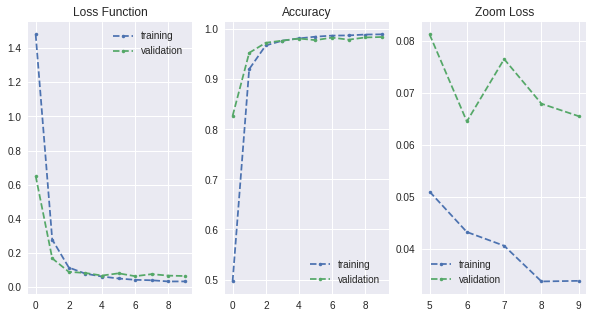

In [37]:
data=np.load('drive/My Drive/history_cnn.npz')
loss,val_loss,acc,val_acc=data['loss'],data['val_loss'],data['acc'],data['val_acc']

fig, axes = plt.subplots(nrows=1, ncols=4,figsize=(20,5))

ax=axes[0]
ax.plot(loss,'.--',label='training')
ax.plot(val_loss,'.--',label='validation')
ax.set_title('Loss Function')
ax.legend()

ax=axes[1]
ax.plot(acc,'.--',label='training')
ax.plot(val_acc,'.--',label='validation')
ax.set_title('Accuracy')
ax.legend()

ax=axes[2]
vepochs=np.arange(np.size(loss))
ax.plot(vepochs[5:],acc[5:],'.--',label='training')
ax.plot(vepochs[5:],val_acc[5:],'.--',label='validation')
ax.set_title('Zoom Accuracy')
ax.legend();

ax=axes[3]
vepochs=np.arange(np.size(loss))
ax.plot(vepochs[5:],loss[5:],'.--',label='training')
ax.plot(vepochs[5:],val_loss[5:],'.--',label='validation')
ax.set_title('Zoom Loss')
ax.legend();

We can also study the layer before the classfication with PCA and k-means. 

Here, k-means performs actually pretty well, with around 96% of accuracy, which is a sign that the data have better clustered in this case.

accuracy score: 0.9673


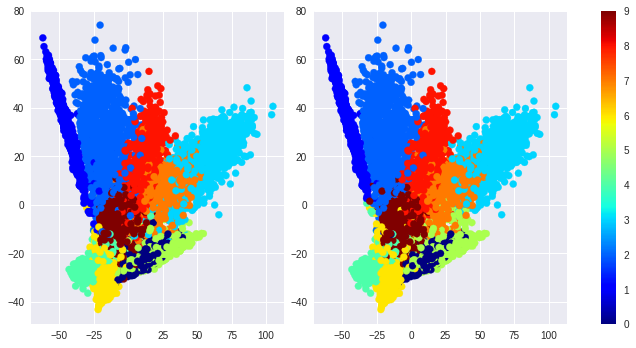

In [49]:
pca = PCA(n_components=2)
layer1=Model(inputs=cnn.input,outputs=cnn.get_layer('dense_6').output)
layer1=layer1.predict(x_test)


# Uncomment these lines to flatten the data coming from the CNN
#s=layer1.shape
#n1=s[1]*s[2]*s[3]
#layer1=layer1.reshape(s[0],n1)

xl1=pca.fit_transform(layer1)

kmeans=KMeans(n_clusters=10)
kmeans.fit(layer1)
y_pred1=kmeans.predict(layer1)


vchange=np.ones(10)*1000
for i in np.arange(10):
  vchange[i]=Counter(y_test1[y_pred1==i]).most_common(1)[0][0]

y_pred=np.copy(y_pred1)
for i in np.arange(10):
  y_pred[y_pred1==i]=vchange[i]
 
print('accuracy score:',accuracy_score(y_test1,y_pred))


fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10,5))

ax=axes[0]
im1=ax.scatter(xl1[:,0],xl1[:,1],c=y_test1,cmap='jet')
ax.set_title('PCA with real labels')


ax=axes[1]
im2=ax.scatter(xl1[:,0],xl1[:,1],c=y_pred,cmap='jet')
ax.set_title('PCA with k_means predicition')

plt.tight_layout()
fig.colorbar(im2,ax=axes.ravel().tolist());

##Batch Normalization
---
We then probe the same model but with a batch normalization layer after each convolutional layer.

In [54]:
cnnb=Sequential()
cnnb.add(Conv2D(16, (3, 3), activation='relu', padding='same',input_shape=(28, 28, 1)))
cnnb.add(BatchNormalization())
cnnb.add(MaxPooling2D(pool_size=(2, 2)))
cnnb.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
cnnb.add(BatchNormalization())
cnnb.add(MaxPooling2D(pool_size=(2, 2)))
cnnb.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
cnnb.add(BatchNormalization())
cnnb.add(MaxPooling2D(pool_size=(2, 2)))
cnnb.add(Flatten())
cnnb.add(Dense(128, activation='relu'))
cnnb.add(Dense(10, activation='relu'))
cnnb.add(Dense(n_classes, activation='softmax'))

cnnb.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
cnnb.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
batch_normalization_10 (Batc (None, 28, 28, 16)        64        
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 14, 14, 16)        2320      
_________________________________________________________________
batch_normalization_11 (Batc (None, 14, 14, 16)        64        
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 7, 7, 16)          2320      
__________

In [55]:
# This line should be put if the model has been previously trained
#model.load_weights('drive/My Drive/weights.best.hdf5')
# checkpoint
filepath="drive/My Drive/weights_cnnb.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=0, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

# Verbose: 0 = silent, 1 = progress bar, 2 = one line per epoch

history=cnnb.fit(x_train, y_train, epochs=10, batch_size=64,validation_split=0.2,callbacks=callbacks_list,verbose=1)

np.savez('drive/My Drive/history_cnnb.npz',loss=history.history['loss'],val_loss=history.history['val_loss']\
         ,acc=history.history['acc'],val_acc=history.history['val_acc'])

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 103s 2ms/step - loss: 0.3757 - acc: 0.8728 - val_loss: 0.0778 - val_acc: 0.9773
Epoch 2/10
48000/48000 [==============================] - 102s 2ms/step - loss: 0.0647 - acc: 0.9800 - val_loss: 0.0635 - val_acc: 0.9822
Epoch 3/10
48000/48000 [==============================] - 105s 2ms/step - loss: 0.0448 - acc: 0.9860 - val_loss: 0.0519 - val_acc: 0.9858
Epoch 4/10
48000/48000 [==============================] - 103s 2ms/step - loss: 0.0346 - acc: 0.9889 - val_loss: 0.0636 - val_acc: 0.9821
Epoch 5/10
48000/48000 [==============================] - 103s 2ms/step - loss: 0.0283 - acc: 0.9914 - val_loss: 0.0508 - val_acc: 0.9864
Epoch 6/10
48000/48000 [==============================] - 103s 2ms/step - loss: 0.0225 - acc: 0.9925 - val_loss: 0.0502 - val_acc: 0.9870
Epoch 7/10
48000/48000 [==============================] - 102s 2ms/step - loss: 0.0216 - acc: 0.9931 - val_loss: 0.0619 - 

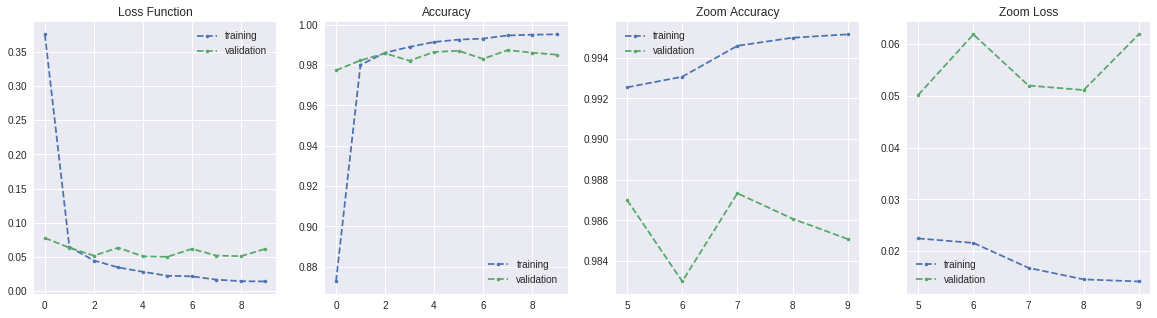

In [59]:
data=np.load('drive/My Drive/history_cnnb.npz')
loss,val_loss,acc,val_acc=data['loss'],data['val_loss'],data['acc'],data['val_acc']

fig, axes = plt.subplots(nrows=1, ncols=4,figsize=(20,5))

ax=axes[0]
ax.plot(loss,'.--',label='training')
ax.plot(val_loss,'.--',label='validation')
ax.set_title('Loss Function')
ax.legend()

ax=axes[1]
ax.plot(acc,'.--',label='training')
ax.plot(val_acc,'.--',label='validation')
ax.set_title('Accuracy')
ax.legend()

ax=axes[2]
vepochs=np.arange(np.size(loss))
ax.plot(vepochs[5:],acc[5:],'.--',label='training')
ax.plot(vepochs[5:],val_acc[5:],'.--',label='validation')
ax.set_title('Zoom Accuracy')
ax.legend();

ax=axes[3]
vepochs=np.arange(np.size(loss))
ax.plot(vepochs[5:],loss[5:],'.--',label='training')
ax.plot(vepochs[5:],val_loss[5:],'.--',label='validation')
ax.set_title('Zoom Loss')
ax.legend();

We are again here in a clear case of overfitting. The training loss is still decreasing pretty well. However, the validation loss is stucked. 

Let's now look at the effect of the convolutional filters on the image.

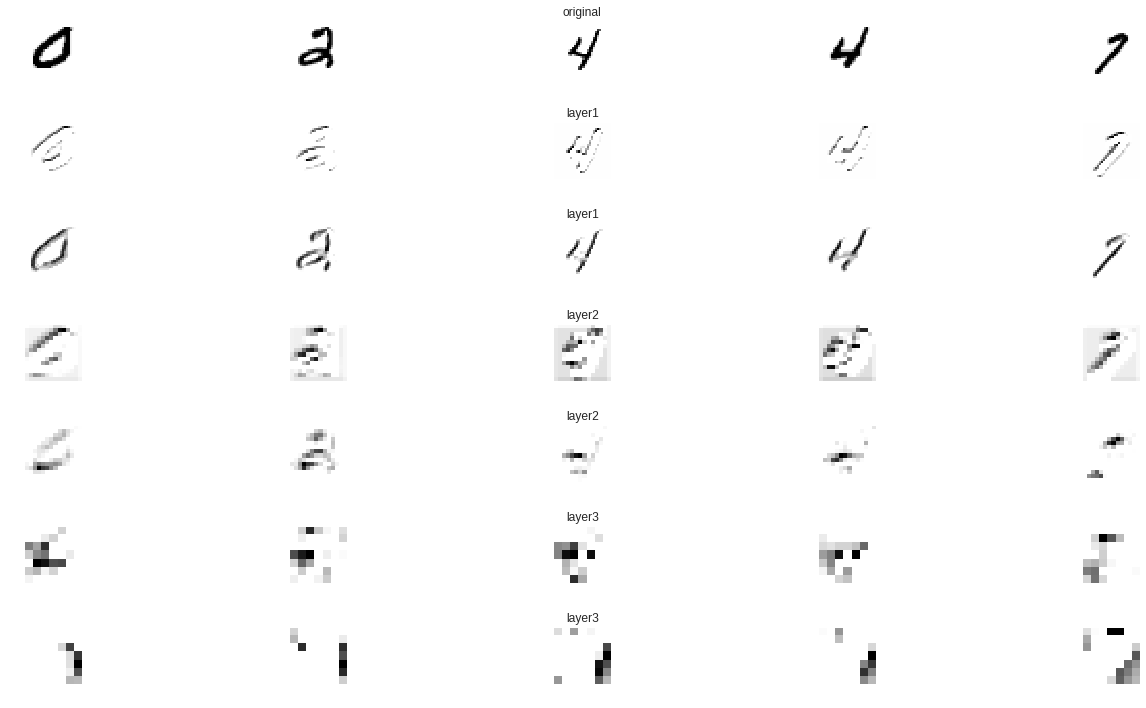

In [116]:
# We take 12 examples in the training set
nexample=5
mask=np.random.randint(x_train.shape[0],size=nexample)

fig,axes=plt.subplots(nrows=7,ncols=nexample,figsize=(20,10))

layer1=Model(inputs=cnnb.input,outputs=cnnb.get_layer('conv2d_13').output)
layer1=layer1.predict(x_train[mask,:,:,:])

layer2=Model(inputs=cnnb.input,outputs=cnnb.get_layer('conv2d_14').output)
layer2=layer2.predict(x_train[mask,:,:,:])

layer3=Model(inputs=cnnb.input,outputs=cnnb.get_layer('conv2d_15').output)
layer3=layer3.predict(x_train[mask,:,:,:])

mat=[x_train1[mask],layer1[:,:,:,0],layer1[:,:,:,1],layer2[:,:,:,0],layer2[:,:,:,1],layer3[:,:,:,1],layer3[:,:,:,0]]

ll=['original','layer1','layer1','layer2','layer2','layer3','layer3']

for j in np.arange(7):
  im=mat[j]
  l=ll[j]
  for i in np.arange(nexample):
    ax=axes[j,i]
    ax.imshow(im[i,:,:],cmap='gray_r')
    if i==2:
      ax.set_title(l)
    ax.axis('off')
    
plt.tight_layout()

The deeper we go, the more abstract the information becomes...

## Data augmentation
---

To avoid overfitting, people developped the data augmentation technique. In the latter,one generates from the training set new images that are rotated, squeezed, translated, deformed... These images are then used as a bigger training set.

The data aumentation is implemented keras. We first train an image generator from our training set.

In [0]:
train_generator = ImageDataGenerator( rotation_range=30, 
                 width_shift_range=0.2, height_shift_range=0.2) 

# separate the training and the validation set

x_train, x_validation, y_train1, y_validation1 = train_test_split(x_train, y_train1, test_size=0.2)
y_train = np_utils.to_categorical(y_train1, n_classes)
y_validation = np_utils.to_categorical(y_validation1, n_classes)

train_generator.fit(x_train, augment=True)

We can have a look at the different examples produced by the generator. The original image is shwon in the top left corner.

label: 4


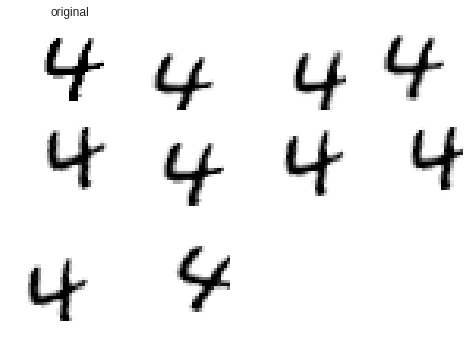

In [6]:
i=np.random.randint(x_train.shape[0])

x=x_train[i,:,:,:]
print('label:',y_train1[i])

plt.subplot(3,4,1)
plt.imshow(x_train[i,:,:,0])
plt.title('original')
plt.axis('off')

for j in np.arange(2,11):
  augmented_images,_=next( train_generator.flow( x.reshape(1,28,28,1),y=[1], batch_size=1))
  plt.subplot(3,4,j)
  plt.imshow(augmented_images[0,:,:,0])
  plt.axis('off')
  

We now reuse the architecture in the previous chapter

In [7]:
cnnb_augm=Sequential()
cnnb_augm.add(Conv2D(16, (3, 3), activation='relu', padding='same',input_shape=(28, 28, 1)))
cnnb_augm.add(BatchNormalization())
cnnb_augm.add(MaxPooling2D(pool_size=(2, 2)))
cnnb_augm.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
cnnb_augm.add(BatchNormalization())
cnnb_augm.add(MaxPooling2D(pool_size=(2, 2)))
cnnb_augm.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
cnnb_augm.add(BatchNormalization())
cnnb_augm.add(MaxPooling2D(pool_size=(2, 2)))
cnnb_augm.add(Flatten())
cnnb_augm.add(Dense(128, activation='relu'))
cnnb_augm.add(Dense(10, activation='relu'))
cnnb_augm.add(Dense(n_classes, activation='softmax'))

cnnb_augm.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
cnnb_augm.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 16)        64        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 16)        2320      
_________________________________________________________________
batch_normalization_2 (Batch (None, 14, 14, 16)        64        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 16)          2320      
__________

We train it on the augmented data.

In [8]:
#model.load_weights('drive/My Drive/weights.best_augmented.hdf5')

# checkpoint
filepath="drive/My Drive/weights.best_cnnb_augm.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=0, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

batch_size=64
epochs=40
history=cnnb_augm.fit_generator(train_generator.flow(x_train, y_train, batch_size=batch_size),
          steps_per_epoch=  x_train.shape[0]//batch_size,validation_data=(x_validation, y_validation),
          epochs=epochs,callbacks=callbacks_list)

np.savez('drive/My Drive/history_cnnb_augm.npz',loss=history.history['loss'],val_loss=history.history['val_loss']\
         ,acc=history.history['acc'],val_acc=history.history['val_acc'])

Epoch 1/40
750/750 [==============================] - 98s 131ms/step - loss: 0.9062 - acc: 0.6893 - val_loss: 0.2137 - val_acc: 0.9354
Epoch 2/40
750/750 [==============================] - 98s 131ms/step - loss: 0.2461 - acc: 0.9243 - val_loss: 0.1993 - val_acc: 0.9344
Epoch 3/40
750/750 [==============================] - 98s 131ms/step - loss: 0.1764 - acc: 0.9453 - val_loss: 0.1325 - val_acc: 0.9581
Epoch 4/40
750/750 [==============================] - 99s 132ms/step - loss: 0.1428 - acc: 0.9557 - val_loss: 0.1255 - val_acc: 0.9615
Epoch 5/40
750/750 [==============================] - 99s 132ms/step - loss: 0.1244 - acc: 0.9621 - val_loss: 0.1443 - val_acc: 0.9592
Epoch 6/40
750/750 [==============================] - 98s 131ms/step - loss: 0.1139 - acc: 0.9648 - val_loss: 0.0815 - val_acc: 0.9758
Epoch 7/40
750/750 [==============================] - 98s 131ms/step - loss: 0.1086 - acc: 0.9666 - val_loss: 0.1062 - val_acc: 0.9689
Epoch 8/40
750/750 [==============================] - 9

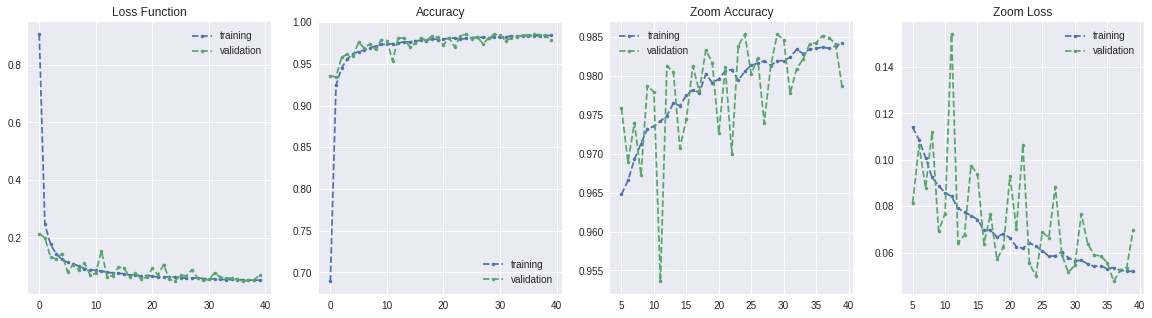

In [9]:
data=np.load('drive/My Drive/history_cnnb_augm.npz')
loss,val_loss,acc,val_acc=data['loss'],data['val_loss'],data['acc'],data['val_acc']

fig, axes = plt.subplots(nrows=1, ncols=4,figsize=(20,5))

ax=axes[0]
ax.plot(loss,'.--',label='training')
ax.plot(val_loss,'.--',label='validation')
ax.set_title('Loss Function')
ax.legend()

ax=axes[1]
ax.plot(acc,'.--',label='training')
ax.plot(val_acc,'.--',label='validation')
ax.set_title('Accuracy')
ax.legend()

ax=axes[2]
vepochs=np.arange(np.size(loss))
ax.plot(vepochs[5:],acc[5:],'.--',label='training')
ax.plot(vepochs[5:],val_acc[5:],'.--',label='validation')
ax.set_title('Zoom Accuracy')
ax.legend();

ax=axes[3]
vepochs=np.arange(np.size(loss))
ax.plot(vepochs[5:],loss[5:],'.--',label='training')
ax.plot(vepochs[5:],val_loss[5:],'.--',label='validation')
ax.set_title('Zoom Loss')
ax.legend();

When plotting the Loss function and the accuracy, we now see that we have prevented the model to overfit as the validation set oscillates around the training curve.

The prediction on the test set is pretty decent with 98.7% of accuracy after 40 epochs.

In [13]:
cnnb_augm.load_weights('drive/My Drive/weights.best_cnnb_augm.hdf5')
y_pred=cnnb_augm.predict_classes(x_test)
print('accuracy:',accuracy_score(y_test1,y_pred))

accuracy: 0.9873


## Transfer learning
---
The transfer learning is a pretty nice technique coming from convolutional neural networks. The idea is the following. Some professional trained very well  some standard architectures such as VGG16, Resnet, GoogleLenet,... on databses such as imagenet. The pretrained network learns to extract relevant features of the models. This knowledge can be transfered to another problem. To this end, one first freeze all the convolutional layers and train the classifier on the new dataset. Then, one performs fine tuning of the convolutional layers.


In this section, we will just freeze the convolutional layers and show that one can reach pretty decent score  on the MNIST by training only the classifier and use the other layers as a feature extractor.

We start by importing the VGG16 model and keep only the 7 first convolutional layers. We then add some dense layers after the feature extractor.

In [3]:
n_classes=10
base_model=VGG16(include_top=False,weights='imagenet',input_shape=(48,48,3))
last = base_model.get_layer('block3_pool').output

# Add classification layers on top of it
x = GlobalAveragePooling2D()(last)
x= BatchNormalization()(x)
x = Dense(256, activation='relu')(x)
x = Dense(256, activation='relu')(x)
pred = Dense(n_classes, activation='softmax')(x)
transfer = Model(base_model.input, pred)
transfer.summary()

58892288/58889256 [==============================] - 3s 0us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 48, 48, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool

The data allowed by the pretrained model do actually not match with our training set. Indeed, the minimal size allowed by the model is (48,48,3). The last number normally corresponds to the 3 RGB channels but we are here working with grey images. To circumvnet this problem, we embed the MNIST images by adding zeros around and by making three copies of the same image for the three layers.

In [4]:
def prepa(xini):
  l1,l2,l3=xini.shape
  xout=np.zeros((l1,48,48,3))
  for i in np.arange(3):
    xout[:,:l2,:l3,i]=xini
  return xout

n_classes=10 #number of classes in the MNIST dataset, numbers from 0 to 9

(x_train,y_train1), (x_test,y_test1) = mnist.load_data()
x_train1 = x_train.astype('float32') / 255.
x_test1 = x_test.astype('float32') / 255.

x_train=prepa(x_train1)
x_test=prepa(x_test1)

y_train = np_utils.to_categorical(y_train1, n_classes) # this keras funtion transforms the labels into vectors. For example, 2 becomes [0,0,1,0,0,0,0,0,0,0]
y_test = np_utils.to_categorical(y_test1, n_classes)

11493376/11490434 [==============================] - 1s 0us/step


Before compiling the model, we ask keras to freeze the convolutional layers

In [0]:
for layer in base_model.layers:
     layer.trainable = False
transfer.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

We then train the model.

In [0]:
# This line should be put if the model has been previously trained
#model.load_weights('drive/My Drive/weights_transfer_best.hdf5')
# checkpoint
filepath="drive/My Drive/weights_transfer_best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=0, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

# Verbose: 0 = silent, 1 = progress bar, 2 = one line per epoch

history=transfer.fit(x_train, y_train, epochs=10, batch_size=64,validation_split=0.2,callbacks=callbacks_list,verbose=1)

np.savez('drive/My Drive/history_transfer.npz',loss=history.history['loss'],val_loss=history.history['val_loss']\
         ,acc=history.history['acc'],val_acc=history.history['val_acc'])

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 996s 21ms/step - loss: 0.0980 - acc: 0.9697 - val_loss: 0.0431 - val_acc: 0.9864
Epoch 2/10
48000/48000 [==============================] - 993s 21ms/step - loss: 0.0388 - acc: 0.9874 - val_loss: 0.0401 - val_acc: 0.9874
Epoch 3/10
48000/48000 [==============================] - 993s 21ms/step - loss: 0.0312 - acc: 0.9903 - val_loss: 0.0371 - val_acc: 0.9893
Epoch 4/10
48000/48000 [==============================] - 996s 21ms/step - loss: 0.0261 - acc: 0.9911 - val_loss: 0.0335 - val_acc: 0.9904
Epoch 5/10
48000/48000 [==============================] - 998s 21ms/step - loss: 0.0212 - acc: 0.9931 - val_loss: 0.0369 - val_acc: 0.9888
Epoch 6/10
48000/48000 [==============================] - 1002s 21ms/step - loss: 0.0201 - acc: 0.9931 - val_loss: 0.0357 - val_acc: 0.9902
Epoch 7/10
48000/48000 [==============================] - 998s 21ms/step - loss: 0.0176 - acc: 0.9945 - val_loss: 0

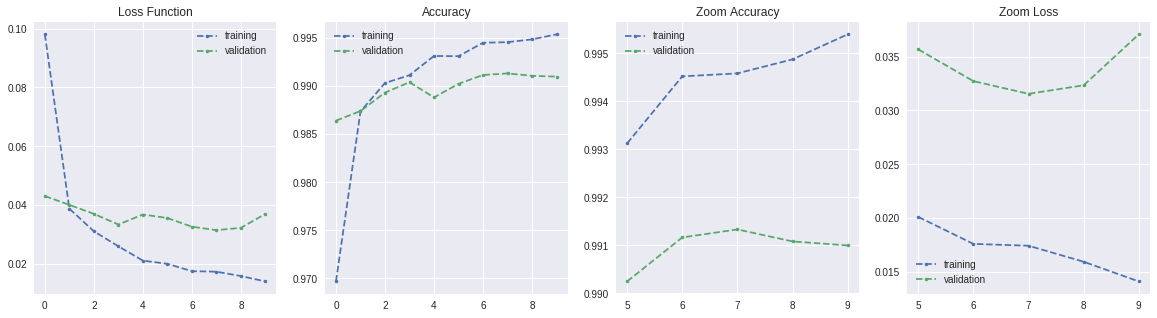

In [6]:
data=np.load('drive/My Drive/history_transfer.npz')
loss,val_loss,acc,val_acc=data['loss'],data['val_loss'],data['acc'],data['val_acc']

fig, axes = plt.subplots(nrows=1, ncols=4,figsize=(20,5))

ax=axes[0]
ax.plot(loss,'.--',label='training')
ax.plot(val_loss,'.--',label='validation')
ax.set_title('Loss Function')
ax.legend()

ax=axes[1]
ax.plot(acc,'.--',label='training')
ax.plot(val_acc,'.--',label='validation')
ax.set_title('Accuracy')
ax.legend()

ax=axes[2]
vepochs=np.arange(np.size(loss))
ax.plot(vepochs[5:],acc[5:],'.--',label='training')
ax.plot(vepochs[5:],val_acc[5:],'.--',label='validation')
ax.set_title('Zoom Accuracy')
ax.legend();

ax=axes[3]
vepochs=np.arange(np.size(loss))
ax.plot(vepochs[5:],loss[5:],'.--',label='training')
ax.plot(vepochs[5:],val_loss[5:],'.--',label='validation')
ax.set_title('Zoom Loss')
ax.legend();

In [7]:
transfer.load_weights('drive/My Drive/weights_transfer_best.hdf5')
y_pred1=transfer.predict(x_test)
y_pred=np.argmax(y_pred1,axis=1)
print('accuracy:',accuracy_score(y_test1,y_pred))

accuracy: 0.9906


The curve converges very fast thanks to the the transfer learning. The history shows a bit of overfitting but this overfitting occurs at 99%! This can be improved by:


*   defreezing the convolutional layers and fine tuning the learning rate
*   combining data augmentation and transfer learning

